In [4]:
import os
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 
os.environ["OMP_NUM_THREADS"] = "1" 

import numpy as np
import matplotlib.pyplot as plt
import torch

import gym
import QDgym_noprint

In [5]:
env = gym.make("QDWalker2DBulletEnv-v0")

In [6]:
obs = env.reset()

In [7]:
for _ in range(29):
    obs,r,done,info = env.step(env.action_space.sample())

In [9]:
info["bc"]

array([0.86206897, 0.48275862])

In [ ]:
# API
# build_interaction_module(env_id, args):
#     returns interaction class
#
# Interaction class have
# - def initial_theta(self, seed=None):
# - def rollout(self, theta, random_state, use_action_noise=False,record_obs=False, obs_mean=None, obs_std=None, render=False):
# - def rollout_batch(self, thetas, batch_size, random_state, use_action_noise=False,record_obs=False,
#                      obs_mean=None, obs_std=None, render=False):

    



In [13]:
from es_map import behavior_map
from es_map import submission_common 

In [14]:
config = {
    "BMAP_type_and_metrics" : ["single_map",    # type can be: "single_map","multi_map","nd_sorted_map" 
                                ["fitness"]]
}
config["map_elites_grid_description"] = submission_common.get_bc_descriptor_for_env("QDWalker2DBulletEnv-v0")

In [15]:
b_map = behavior_map.Grid_behaviour_map(config)

In [19]:
coords = b_map.get_cell_coords(info["bc"])

In [18]:
b_map.data.shape

(32, 32)

In [21]:
a = b_map.data[coords]

In [2]:
import os
import numpy as np
from gym.envs.mujoco import mujoco_env
from gym import utils
from mujoco_py.generated import const

In [3]:
from es_map.interaction import custom_gym
from es_map.interaction import interaction

In [29]:
env = gym.make("QDAntBulletEnv-v0");
env.observation_space.shape[0]
env.action_space.shape[0]

The behavioural desciptor is 4-dimentional and defined as proportion of feet contact time with the ground in the order ['front_left_foot', 'front_right_foot', 'left_back_foot', 'right_back_foot']


8

In [38]:
env._max_episode_steps 

1000

In [5]:
config = {
    "env_id" : "DamageAnt-v2",
    "policy_args" : {
        "init" : "normc",
        "layers" :[256, 256],
       "activation" : 'tanh',
       "action_noise" : 0.01,
    },
    "env_args" : {
        "use_norm_obs" : True,
    },
}

In [26]:
random_state = np.random.RandomState()
env_id = "QDAntBulletEnv-v0"
config["env_id"] = env_id
env = interaction.build_interaction_module(env_id,config)
theta = env.initial_theta()
res1 = env.rollout(theta,random_state=random_state,use_action_noise=True,record_obs=True,render=False)
env_id = "QDWalker2DBulletEnv-v0"
config["env_id"] = env_id
env = interaction.build_interaction_module(env_id,config)
theta = env.initial_theta()
res2 = env.rollout(theta,random_state=random_state,use_action_noise=True,record_obs=True,render=False)
env_id = "QDHalfCheetahBulletEnv-v0"
config["env_id"] = env_id
env = interaction.build_interaction_module(env_id,config)
theta = env.initial_theta()
res3 = env.rollout(theta,random_state=random_state,use_action_noise=True,record_obs=True,render=False)
env_id = "QDHopperBulletEnv-v0"
config["env_id"] = env_id
env = interaction.build_interaction_module(env_id,config)
theta = env.initial_theta()
res4 = env.rollout(theta,random_state=random_state,use_action_noise=True,record_obs=True,render=False)

The behavioural desciptor is 4-dimentional and defined as proportion of feet contact time with the ground in the order ['front_left_foot', 'front_right_foot', 'left_back_foot', 'right_back_foot']
The behavioural desciptor is 4-dimentional and defined as proportion of feet contact time with the ground in the order ['front_left_foot', 'front_right_foot', 'left_back_foot', 'right_back_foot']
The behavioural desciptor is 2-dimentional and defined as proportion of feet contact time with the ground in the order ['foot', 'foot_left']
The behavioural desciptor is 2-dimentional and defined as proportion of feet contact time with the ground in the order ['foot', 'foot_left']
The behavioural desciptor is 2-dimentional and defined as proportion of feet contact time with the ground in the order ['ffoot', 'bfoot']
The behavioural desciptor is 2-dimentional and defined as proportion of feet contact time with the ground in the order ['ffoot', 'bfoot']
The behavioural desciptor is 1-dimentional and def

In [18]:
print(res1)
print(res2)
print(res3)
print(res4)

(9.992199696611896, 19, array([0., 0., 0., 0.]), None, array([-3.8219078e+00,  1.2313026e-01,  2.0999451e+01, -8.8261841e-03,
       -1.0444443e-03, -9.0804415e+00, -1.1636292e-02, -3.4444500e-02,
        4.4746462e-01,  7.7356480e-02, -3.6491123e+01,  6.7976254e-01,
       -2.1503839e+00,  4.2067491e-02,  3.7792053e+01, -5.6049669e-01,
        3.6218110e-01,  7.3417626e-02,  4.2113384e+01, -6.0183823e-01,
       -1.9315624e+00,  1.3490291e-01, -4.1221275e+01,  7.4535686e-01,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
      dtype=float32), array([1.2588540e+00, 1.0934693e-03, 2.0998907e+01, 7.0014516e-06,
       4.5723653e-05, 5.6190162e+00, 1.0599448e-05, 1.5409662e-04,
       1.1600185e-02, 1.4924539e-03, 6.3426380e+01, 2.7865285e-01,
       2.2135785e-01, 1.2516867e-03, 6.8019951e+01, 2.7920029e-01,
       7.8983065e-03, 1.1551110e-03, 8.4463646e+01, 2.9911983e-01,
       1.8135551e-01, 1.8016640e-03, 8.0934723e+01, 3.1113508e-01,
       0.0000000e+00, 0

In [12]:
#env = interaction.Ant(config)

In [8]:
env.model
theta = env.initial_theta()

In [9]:
%%time


env.rollout(theta,random_state=random_state,use_action_noise=False,record_obs=False,render=False)
env.rollout(theta,random_state=random_state,use_action_noise=False,record_obs=True,render=False)
env.rollout(theta,random_state=random_state,use_action_noise=True,record_obs=False,render=False)
env.rollout(theta,random_state=random_state,use_action_noise=True,record_obs=True,render=False)
#theta, random_state, eval=False, obs_mean=None, obs_std=None, render=False

CPU times: user 1.81 s, sys: 2.06 ms, total: 1.81 s
Wall time: 1.81 s


(1002.7926287039173,
 999,
 array([0.696, 0.872, 0.878, 0.685]),
 0.16214405193211767,
 array([ 3.83630895e+02,  9.99879897e+02, -4.64515239e-01,  4.63804442e-02,
         2.53708341e+01, -2.10716422e+02,  5.39636060e+02,  6.30256248e+01,
        -5.45654732e+02,  8.08990853e+01, -5.39261531e+02,  3.89313220e+02,
         5.39880462e+02,  3.36159736e+00, -6.46247570e+00, -9.91758682e+00,
         5.32591530e+00,  3.47893341e+00, -1.56037068e+00, -5.38921411e+00,
         6.22404437e+00,  4.64220721e+00, -9.06186889e+00,  1.01964704e+00,
        -6.56291014e+00,  1.18464267e+01,  8.16796872e+00]),
 array([1.48808271e+02, 9.98762946e+02, 6.11395659e-02, 5.63075221e-02,
        2.11960733e+00, 6.24043265e+01, 2.95555480e+02, 2.07963441e+01,
        3.05010891e+02, 2.89559290e+01, 2.94961600e+02, 1.67093749e+02,
        2.96450401e+02, 4.31112957e+00, 4.03917614e+00, 7.93187310e+00,
        8.01182872e+00, 6.15583165e+00, 5.49347667e+00, 1.45161791e+01,
        2.21957798e+02, 1.25629148e+

In [10]:
for a in env.model.weight:
    print(a.shape)

(27, 256)
(256, 256)
(256, 8)


In [81]:
a = np.random.RandomState()

In [17]:
a.seed(5)

In [82]:
a.rand()

0.44729995513369003

In [19]:
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

EasyProcessError: start error <EasyProcess cmd_param=['Xvfb', '-help'] cmd=['Xvfb', '-help'] oserror=[Errno 2] No such file or directory: 'Xvfb' return_code=None stdout="None" stderr="None" timeout_happened=False>

In [34]:
a = np.random.randint(0,4,5)

In [37]:
a.size

5

In [42]:
list(range(0,11,10))

[0, 10]

In [39]:
a = list(range(15))

In [43]:
a[10:20]

[10, 11, 12, 13, 14]

In [2]:
from dask.distributed import Client
import dask

In [3]:
import os
os.chdir("/scratch/ak1774/runs")

In [4]:
client = Client()

In [53]:
dask.config.get("temporary_directory")

In [10]:
central_theta = np.zeros(1000000)

In [11]:
indicies = range(100)


In [8]:
def func(i,c):
    from es_map.interaction import interaction
    return np.sum(c)/i

def func2(i,c,config):
    from es_map.interaction import interaction
    return np.sum(c)/i

In [23]:
%%time
central_theta_f = client.scatter(central_theta,broadcast=True)
res = client.map(func,indicies,c=central_theta_f)
res = client.gather(res)

CPU times: user 199 ms, sys: 10.9 ms, total: 210 ms
Wall time: 219 ms


In [24]:
%%time
central_theta_f = client.scatter(central_theta,broadcast=True)
res = client.map(func2,indicies,c=central_theta_f,config=config)
res = client.gather(res)

CPU times: user 238 ms, sys: 6.19 ms, total: 244 ms
Wall time: 245 ms


In [25]:
%%time
res = client.map(func,indicies,c=central_theta)
res = client.gather(res)

CPU times: user 1.31 s, sys: 49.8 ms, total: 1.36 s
Wall time: 1.2 s


In [61]:
res = client.gather(res)

In [ ]:
np.concatenate

In [75]:
import sys
sys.path

['/home/userfs/a/ak1774/workspace/evolvability_map_elites/evolvability_map_elites',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/scratch/ak1774/vargpu_env/lib/python3.8/site-packages',
 '/scratch/ak1774/vargpu_env/lib/python3.8/site-packages/IPython/extensions',
 '/home/userfs/a/ak1774/.ipython']

In [1]:
import os
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 
os.environ["OMP_NUM_THREADS"] = "1" 


In [2]:
from dask.distributed import Client
import dask
import os
os.chdir("/scratch/ak1774/runs")
client = Client(n_workers=60, threads_per_worker=1)
client

def set_up_worker():
    import os
    os.environ["MKL_NUM_THREADS"] = "1" 
    os.environ["NUMEXPR_NUM_THREADS"] = "1" 
    os.environ["OMP_NUM_THREADS"] = "1" 
    
client.run(set_up_worker)

{'tcp://127.0.0.1:32827': None,
 'tcp://127.0.0.1:33009': None,
 'tcp://127.0.0.1:33091': None,
 'tcp://127.0.0.1:33259': None,
 'tcp://127.0.0.1:33417': None,
 'tcp://127.0.0.1:33469': None,
 'tcp://127.0.0.1:33753': None,
 'tcp://127.0.0.1:34043': None,
 'tcp://127.0.0.1:34381': None,
 'tcp://127.0.0.1:34851': None,
 'tcp://127.0.0.1:35165': None,
 'tcp://127.0.0.1:35195': None,
 'tcp://127.0.0.1:35253': None,
 'tcp://127.0.0.1:35519': None,
 'tcp://127.0.0.1:35701': None,
 'tcp://127.0.0.1:35833': None,
 'tcp://127.0.0.1:36841': None,
 'tcp://127.0.0.1:37405': None,
 'tcp://127.0.0.1:37791': None,
 'tcp://127.0.0.1:37817': None,
 'tcp://127.0.0.1:37837': None,
 'tcp://127.0.0.1:38145': None,
 'tcp://127.0.0.1:38151': None,
 'tcp://127.0.0.1:38495': None,
 'tcp://127.0.0.1:38677': None,
 'tcp://127.0.0.1:39497': None,
 'tcp://127.0.0.1:40019': None,
 'tcp://127.0.0.1:40233': None,
 'tcp://127.0.0.1:40241': None,
 'tcp://127.0.0.1:40591': None,
 'tcp://127.0.0.1:40837': None,
 'tcp://

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from es_map import es_update
from es_map.interaction import interaction

In [4]:
config = {
    "env_id" : "DamageAnt-v2",
    "policy_args" : {
        "init" : "normc",
        "layers" :[256, 256],
       "activation" : 'tanh',
       "action_noise" : 0.01,
    },
    "env_args" : {
        "use_norm_obs" : True,
    },
    "ES_popsize" : 2000,
    "ES_sigma" : 0.01,
    
    # DISTRIBUTED SETTING
    "ES_EVALUATION_BATCH_SIZE" : 10,
}

In [5]:
env = interaction.build_interaction_module(config["env_id"],config)

In [6]:
theta = env.initial_theta()

In [11]:
%%time
for _ in range(10):
    es_update.evaluate_individual_local(theta,obs_mean=None,obs_std=None,eval=False,config=config)

CPU times: user 5.72 s, sys: 536 ms, total: 6.25 s
Wall time: 5.74 s


In [12]:
%%time
res = [client.submit(es_update.evaluate_individual_local,theta,obs_mean=None,obs_std=None,eval=False,config=config) for _ in range(10)]
res = client.gather(res)

CPU times: user 613 ms, sys: 166 ms, total: 779 ms
Wall time: 1.83 s


In [7]:
%%time
res = es_update.es_evaluate_children(client,central_theta=theta,obs_mean=env.model.obs_stats.mean,
                                                         obs_std=env.model.obs_stats.std,
                                                         config=config)

mean batch time is:  14.45363800406456
CPU times: user 18.4 s, sys: 5.89 s, total: 24.3 s
Wall time: 57.9 s


In [46]:
res

{'noise_descriptors': [(15536287, 1),
  (86398986, 1),
  (3931112, 1),
  (61850656, 1),
  (9164245, 1),
  (48693134, 1),
  (79238908, 1),
  (46612864, 1),
  (13120791, 1),
  (59288320, 1),
  (30086285, 1),
  (236167, 1),
  (76102586, 1),
  (2045318, 1),
  (43974833, 1),
  (18632230, 1),
  (64373304, 1),
  (47325167, 1),
  (25709399, 1),
  (10212311, 1),
  (15536287, -1),
  (86398986, -1),
  (3931112, -1),
  (61850656, -1),
  (9164245, -1),
  (48693134, -1),
  (79238908, -1),
  (46612864, -1),
  (13120791, -1),
  (59288320, -1),
  (30086285, -1),
  (236167, -1),
  (76102586, -1),
  (2045318, -1),
  (43974833, -1),
  (18632230, -1),
  (64373304, -1),
  (47325167, -1),
  (25709399, -1),
  (10212311, -1)],
 'fitnesses': array([ 994.38593999, 1001.15106617,  997.10004033, 1001.93989278,
        1001.28636351,  991.47081519, 1004.17402391,  991.17894073,
         992.31558875,  996.07138453,  995.53432855, 1003.59383833,
        1002.32417685,  995.50500509,  993.09637882, 1004.11757308,
   

In [6]:
%%time
from es_map.interaction import interaction
env = interaction.build_interaction_module(config["env_id"],config)

CPU times: user 19.4 ms, sys: 4.89 ms, total: 24.3 ms
Wall time: 22.5 ms


In [9]:
%%time
env.rollout( theta, random_state=np.random.RandomState(), eval=False, obs_mean=None, obs_std=None, render=False)

CPU times: user 544 ms, sys: 7.49 ms, total: 552 ms
Wall time: 513 ms


(677.3798546074639,
 999,
 array([0.922, 0.227, 0.942, 0.734]),
 -0.16646408420047717,
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 0)

In [17]:
np.__config__.show()

blas_mkl_info:
  NOT AVAILABLE
blis_info:
  NOT AVAILABLE
openblas_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
blas_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
lapack_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]


In [17]:
def centered_rank_normalizer(x):
    if len(x.shape) == 1:
        return compute_centered_ranks(x)
    elif len(x.shape) == 2:
        ranked = np.zeros(x.shape)
        for i in range(x.shape[1]):
            ranked[:, i] = compute_centered_ranks(x[:, i])
        return ranked
    raise ValueError("X must have 1 or 2 dimensions")

def compute_ranks(x):
    """
    Returns ranks in [0, len(x))
    Note: This is different from scipy.stats.rankdata, which returns ranks in [1, len(x)].
    """
    assert x.ndim == 1
    ranks = np.empty(len(x), dtype=int)
    ranks[x.argsort()] = np.arange(len(x))
    return ranks


def compute_centered_ranks(x):
    y = compute_ranks(x.ravel()).reshape(x.shape).astype(np.float32)
    y /= x.size - 1
    y -= .5
    return y

In [24]:
x = np.random.randn(29,4)
np.sum(centered_rank_normalizer(x),axis=1)

array([ 0.6071429 ,  0.2142857 , -1.17857143, -0.60714287, -0.07142857,
       -0.74999997, -0.9285714 , -0.5       , -0.5357143 ,  0.78571433,
       -0.07142854,  0.10714284,  0.64285719, -0.3214286 ,  0.50000003,
        1.39285713, -0.42857143, -0.03571433,  0.4285714 ,  0.32142857,
       -0.32142857, -0.46428567, -0.10714287, -0.3214286 ,  1.53571433,
       -0.14285716,  0.57142857, -0.35714287,  0.0357143 ])

In [17]:
a = np.random.randn(10,2)
b = np.random.randn(2)

In [18]:
a-b

array([[ 1.47726218,  1.78892368],
       [ 0.19184764,  2.05596825],
       [-0.93684622, -1.34920474],
       [ 1.16094895,  0.12176406],
       [ 0.12258614, -0.94618651],
       [-0.56786051, -0.04309731],
       [ 1.1958597 , -0.21224957],
       [ 0.8933006 ,  2.10420853],
       [ 1.22878732, -0.06128376],
       [ 1.90495068, -1.4329343 ]])

In [19]:
a

array([[ 1.25621619,  1.66505038],
       [-0.02919834,  1.93209496],
       [-1.1578922 , -1.47307804],
       [ 0.93990297, -0.00210923],
       [-0.09845984, -1.07005981],
       [-0.78890649, -0.16697061],
       [ 0.97481372, -0.33612287],
       [ 0.67225462,  1.98033523],
       [ 1.00774133, -0.18515706],
       [ 1.68390469, -1.5568076 ]])

In [20]:
b

array([-0.22104598, -0.1238733 ])

In [28]:
import itertools
        
def create_id_generator():
    counter = itertools.count()
    def get_next_id():
        return next(counter)
    return get_next_id
    
get_next_individual_id = create_id_generator()

In [37]:
get_next_individual_id()

8

In [21]:

import itertools
a = itertools.count()

In [27]:
next(a)

2

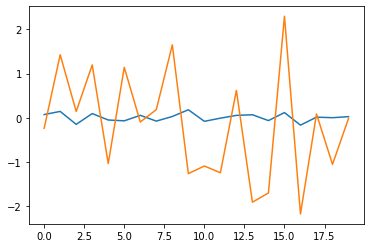

In [3]:
import numpy as np
import matplotlib.pyplot as plt
a = np.random.randn(20) * 0.1
b = np.random.randn(20)

plt.plot(a)
plt.plot(b)
plt.ylabel()